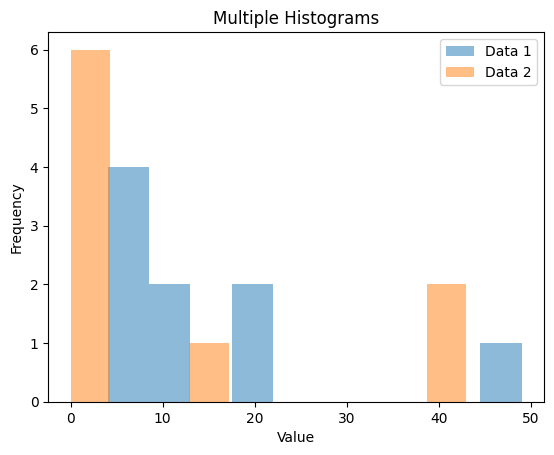

In [1]:
# X1 = [12,5,11,11,9,18]
# X2 = [7,3,4,6,3,13]
import matplotlib.pyplot as plt

TV_FAVORABLE = [12,4,5,20,5,5,20,10,49]
TV_UNFAVORABLE = [43,14,42,1,2,0,1,0,0]

# Create multiple histograms
plt.hist(TV_FAVORABLE, alpha=0.5, label='Data 1')
plt.hist(TV_UNFAVORABLE, alpha=0.5, label='Data 2')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Multiple Histograms')

# Add legend
plt.legend()

# Show the plot
plt.show()

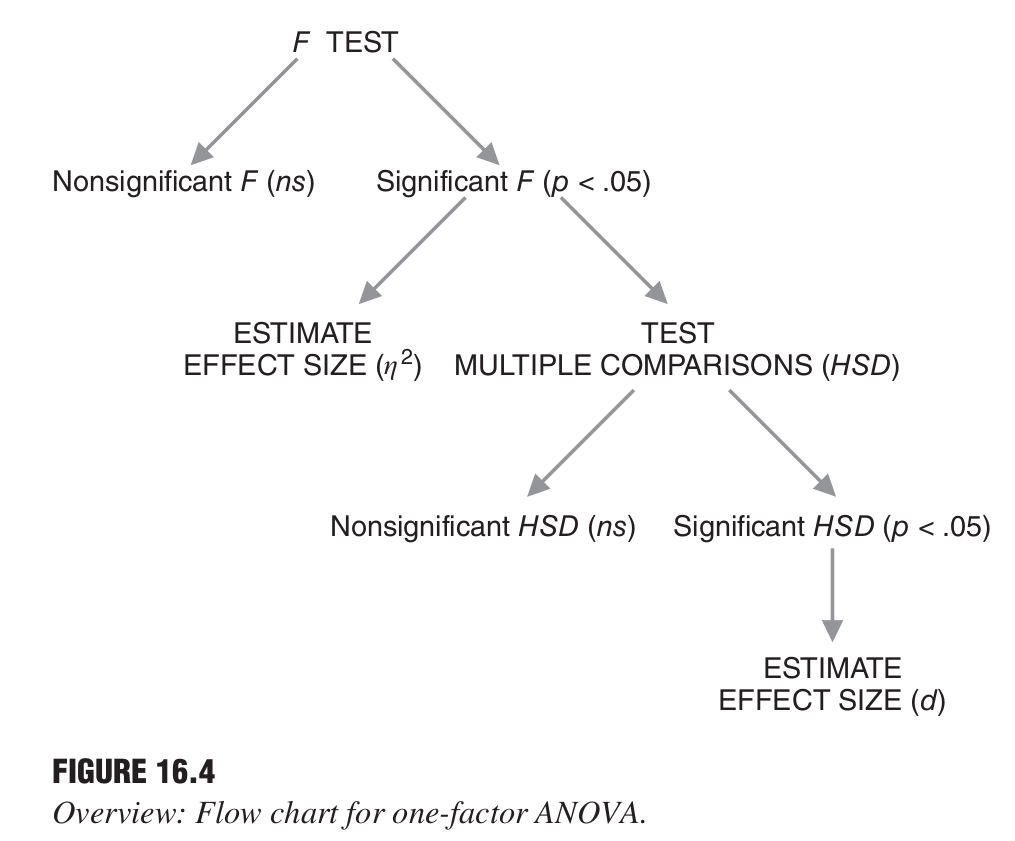

In [2]:
from IPython.display import Image
image_path = "stat_infographic/Statistics_Flowchart_one_factor_ANOVA.png"
Image(filename=image_path)

In [3]:
def SS_Terms_Repeated_ANOVA(the_data,alpha):
    import statistics,math,numpy
    from scipy.stats import f
    import statsmodels.stats.libqsturng as qsturng

    joined_data = numpy.concatenate(the_data)
    print(f'joined_data = {joined_data}')

    k = len(the_data)
    print(f'k = {k}')

    N = len(joined_data)
    print(f'N = {N}')

    n = len(the_data[0])
    print(f'n = {n}')

    df_total = N-1
    print(f'df_total = {df_total}')

    df_between = k-1
    print(f'df_between = {df_between}')

    df_within = N-k
    print(f'df_within = {df_within}')

    df_subject = n-1
    print(f'df_subject = {df_subject}')

    df_error = df_within - df_subject
    print(f'df_error = {df_error}')
    
    T = [sum(data) for data in the_data]
    print(f'T = {T}')

    G = sum(T)
    print(f'G = {G}')

    T_sq_over_n = [round(t**2/n,3) for t in T]
    print(f'T_sq_over_n = {T_sq_over_n}')

    G_sq_over_N = G**2/N
    print(f'G_sq_over_N = {G_sq_over_N}')

    SS_between = round(sum(T_sq_over_n) - G_sq_over_N,3)
    print(f'SS_between = {SS_between}')

    sum_X_sq = sum([num**2 for num in joined_data])
    print(f'sum_X_sq = {sum_X_sq}')

    SS_within = round(sum_X_sq - sum(T_sq_over_n),3)
    print(f'SS_within = {SS_within}')

    # Subjects
    subjects = []
    n = 0
    while n < len(the_data[0]):
        temp = []
        subjects.append(temp)
        for i in range(len(the_data)):
            temp.append(the_data[i][n])
        n+=1
    print(f'subjects = {subjects}')

    subject_totals = [sum(list) for list in subjects]
    print(f'subject_totals = {subject_totals}')

    T_sq_subject = [round(num**2/k,3) for num in subject_totals]
    print(f'T_sq_subject = {T_sq_subject}')

    SS_subject = round(sum(T_sq_subject) - G_sq_over_N,3)
    print(f'SS_subject = {SS_subject}')

    SS_error = round(SS_within - SS_subject,3)
    print(f'SS_error = {SS_error}')

    SS_total = sum_X_sq - G_sq_over_N
    print(f'SS_total = {SS_total}')

    MS_between = SS_between/df_between
    print(f'MS_between = {MS_between}')

    MS_error = round(SS_error/df_error,3)
    print(f'MS_error = {MS_error}')

    F_ratio = round(MS_between/MS_error,3)
    print(f'F_ratio = {F_ratio}')

    F_critical_value = round(f.ppf(1 - alpha, df_between, df_error),3)
    print(f'F_critical_value = {F_critical_value}')

    if F_ratio >= F_critical_value:
        print(f'F_ratio = {F_ratio} is GREATER or EQUAL to F_critical_value = {F_critical_value}, therefore we will REJECT the Null Hypothesis')
    else:
        print(f'F_ratio = {F_ratio} is LESS than the F_critical_value = {F_critical_value}, therefore we will RETAIN the Null Hypothesis')

    eta_sq_p = round(SS_between/(SS_between + SS_error),3)
    print(f'proportion of explained variance = {eta_sq_p}')

    means = [round(statistics.mean(list),3) for list in the_data]
    print(f'means = {means}')

    q = round(qsturng.qsturng(1 - alpha, k, df_error),3)
    print(f'q = {q}')

    HSD = round(q*((MS_error/n)**0.5),3)
    print(f'HSD = {HSD}')
    
    means_list = list(set(means))

    Cohens_ds = [round(((max(means)-means_list[n])/MS_error**0.5),3) for n in range(1,len(means_list))]
    print(f"Cohen's_ds = {Cohens_ds}")
    

X0 = [0,4,2]
X24 = [3,6,6]
X48 = [6,8,10]
a = [X0,X24,X48]
SS_Terms_Repeated_ANOVA(a,0.05)
print('===========')
# Using SLEEP-DEPRIVATION EXPERIMENT: REPEATED MEASURES (means)
MS_error = 1.0
d48_0 = 6/(MS_error**0.5)
d48_24 = 3/(MS_error**0.5)
print(f'd48_0 = {d48_0}\nd48_24 = {d48_24}')

joined_data = [ 0  4  2  3  6  6  6  8 10]
k = 3
N = 9
n = 3
df_total = 8
df_between = 2
df_within = 6
df_subject = 2
df_error = 4
T = [6, 15, 24]
G = 45
T_sq_over_n = [12.0, 75.0, 192.0]
G_sq_over_N = 225.0
SS_between = 54.0
sum_X_sq = 301
SS_within = 22.0
subjects = [[0, 3, 6], [4, 6, 8], [2, 6, 10]]
subject_totals = [9, 18, 18]
T_sq_subject = [27.0, 108.0, 108.0]
SS_subject = 18.0
SS_error = 4.0
SS_total = 76.0
MS_between = 27.0
MS_error = 1.0
F_ratio = 27.0
F_critical_value = 6.944
F_ratio = 27.0 is GREATER or EQUAL to F_critical_value = 6.944, therefore we will REJECT the Null Hypothesis
proportion of explained variance = 0.931
means = [2, 5, 8]
q = 5.033
HSD = 2.906
Cohen's_ds = [6.0, 3.0]
d48_0 = 6.0
d48_24 = 3.0


In [4]:
def calculate_q(df_within, k):
    return df_within / k

# Given values
df_within = 10  # Example value, replace with actual value
k = 12          # Example value, replace with actual value

# Calculate q
q = calculate_q(df_within, k)

print("Value of q:", q)


Value of q: 0.8333333333333334


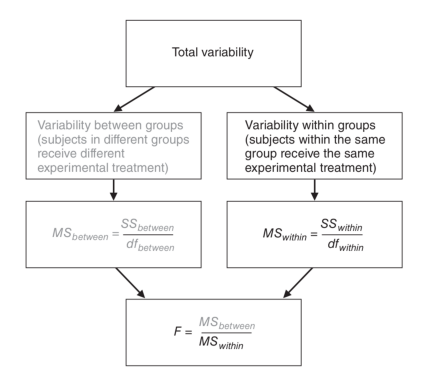

In [15]:
import matplotlib.pyplot as plt
import os

# Path to the image file
image_path = 'stat_infographic/two_factor_anova_flowchart.png'

# Check if the file exists
if os.path.exists(image_path):
    # Load and display the image
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print("File not found:", image_path)